# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.457  1  0.889 0.347 0.005   
                             age        0.064  1  0.125 0.724 0.001   
                             Kiel       1.880  1  3.660 0.057 0.019   
                             Magdeburg  4.623  1  9.001 0.003 0.045   
                             Sweden     8.611  1 16.767 0.000 0.081   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.494  1  1.486 0.224 0.008   
                             age        2.169  1  2.156 0.144 0.011   
                             Kiel       0.082  1  0.082 0.775 0.000   
                             Magdeburg  4.730  1  4.703 0.031 0.024   
                             Sweden    12.167  1 12.098 0.001 0.060   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.460  0.510    False  
                             age               0.140  0.824    False  
                             Kiel              1.242  0.135    False  
                             Magdeburg         2.515  0.013     True  
                             Sweden            4.205  0.000     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.649  0.378    False  
                             age               0.843  0.273    False  
                             Kiel              0.111  0.858    False  
                             Magdeburg         1.504  0.085    False  
                             Sweden            3.204  0.003     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.002  1  7.101 0.008 0.036   
                             age        0.008  1  0.055 0.815 0.000   
                             Kiel       0.291  1  2.065 0.152 0.011   
                             Magdeburg  0.520  1  3.684 0.056 0.019   
                             Sweden     1.914  1 13.574 0.000 0.066   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.909  1  3.726 0.055 0.019   
                             age        0.613  1  1.196 0.275 0.006   
                             Kiel       2.813  1  5.490 0.020 0.028   
                             Magdeburg  2.851  1  5.563 0.019 0.028   
                             Sweden    17.583  1 34.310 0.000 0.152   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.078  0.024     True  
                             age               0.089  0.879    False  
                             Kiel              0.817  0.255    False  
                             Magdeburg         1.249  0.116    False  
                             Sweden            3.525  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.259  0.113    False  
                             age               0.560  0.404    False  
                             Kiel              1.696  0.049     True  
                             Magdeburg         1.713  0.048     True  
                             Sweden            7.694  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.078  0.024     True   
                             Kiel      0.152         0.817  0.255    False   
                             Magdeburg 0.056         1.249  0.116    False   
                             Sweden    0.000         3.525  0.001     True   
                             age       0.815         0.089  0.879    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.055         1.259  0.113    False   
                             Kiel      0.020         1.696  0.049     True   
                             Magdeburg 0.019         1.713  0.048     True   
                             Sweden    0.000         7.694  0.000     True   
                             age       0.275         0.560  0.404    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.347         0.460  0.510    False  
                             Kiel      0.057         1.242  0.135    False  
                             Magdeburg 0.003         2.515  0.013     True  
                             Sweden    0.000         4.205  0.000     True  
                             age       0.724         0.140  0.824    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.224         0.649  0.378    False  
                             Kiel      0.775         0.111  0.858    False  
                             Magdeburg 0.031         1.504  0.085    False  
                             Sweden    0.001         3.204  0.003     True  
                             age       0.144         0.843  0.273    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.227         3.196     0.281     0.261         2.485     0.337
std       0.295         6.009     0.321     0.303         5.361     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.407     0.002     0.004         0.332     0.015
50%       0.065         1.185     0.130     0.120         0.921     0.240
75%       0.392         3.252     0.523     0.465         2.431     0.620
max       0.999        86.825     0.999     0.999       147.975     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49961/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.078   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.444   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.446         0.351   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.255         0.593   
A0A075B6H7                                         AD     0.000         3.365   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.210         0.678   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.481         0.318   
S4R3U6                                             AD     0.055         1.259   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.024     True   
A0A024R0T9;K7ER74;P02655                           AD      0.080    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.573    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.381    False   
A0A075B6H7                                         AD      0.002     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.285    False   
Q9Y6X5                                             AD      0.328    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.159    False   
Q9Y6Y9                                             AD      0.605    False   
S4R3U6                                             AD      0.113    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.347         0.460   
A0A024R0T9;K7ER74;P02655                           AD     0.082         1.089   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.080         1.097   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.522         0.282   
A0A075B6H7                                         AD     0.024         1.628   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.014         1.841   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.375         0.426   
S4R3U6                                             AD     0.224         0.649   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.510    False  
A0A024R0T9;K7ER74;P02655                           AD      0.178    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.175    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.669    False  
A0A075B6H7                                         AD      0.068    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.244         1.586     0.304     0.252         1.404     0.335
std       0.299         1.884     0.320     0.292         1.602     0.316
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.007         0.378     0.019     0.012         0.364     0.038
50%       0.095         1.022     0.177     0.119         0.925     0.238
75%       0.419         2.173     0.548     0.433         1.937     0.594
max       0.999        25.519     0.999     0.999        19.518     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,956,1031


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.008         2.078  0.024   
A0A024R0T9;K7ER74;P02655                           0.036         1.444  0.080   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.446         0.351  0.573   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.255         0.593  0.381   
A0A075B6H7                                         0.000         3.365  0.002   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.285   
Q9Y6X5                                             0.210         0.678  0.328   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.159   
Q9Y6Y9                                             0.481         0.318  0.605   
S4R3U6                                             0.055         1.259  0.113   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.347   
A0A024R0T9;K7ER74;P02655                              False 0.082   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.080   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.522   
A0A075B6H7                                             True 0.024   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.014   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.375   
S4R3U6                                                False 0.224   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.460  0.510   
A0A024R0T9;K7ER74;P02655                                   1.089  0.178   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.097  0.175   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.282  0.669   
A0A075B6H7                                                 1.628  0.068   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.841  0.045   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.426  0.538   
S4R3U6                                                     0.649  0.378   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    896
CF (yes) - PI (yes)   330
CF (yes) - PI (no)    135
CF (no)  - PI (yes)    60
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49961/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.008         2.078  0.024   
A0A075B6H7                                         0.000         3.365  0.002   
A0A075B6I0                                         0.001         3.015  0.004   
A0A075B6J9                                         0.004         2.366  0.013   
A0A075B6R2                                         0.002         2.711  0.007   
...                                                  ...           ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.239         0.622  0.362   
Q9UNW1                                             0.883         0.054  0.928   
Q9UP79                                             0.000         4.896  0.000   
Q9UQ52                                             0.001         3.106  0.003   
Q9Y6X5                                             0.210         0.678  0.328   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.347   
A0A075B6H7                                             True 0.024   
A0A075B6I0                                             True 0.025   
A0A075B6J9                                             True 0.038   
A0A075B6R2                                             True 0.284   
...                                                     ...   ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False 0.004   
Q9UNW1                                                False 0.007   
Q9UP79                                                 True 0.279   
Q9UQ52                                                 True 0.029   
Q9Y6X5                                                False 0.014   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.460  0.510   
A0A075B6H7                                                 1.628  0.068   
A0A075B6I0                                                 1.600  0.071   
A0A075B6J9                                                 1.415  0.099   
A0A075B6R2                                                 0.546  0.445   
...                                                          ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         2.443  0.014   
Q9UNW1                                                     2.148  0.026   
Q9UP79                                                     0.554  0.439   
Q9UQ52                                                     1.542  0.079   
Q9Y6X5                                                     1.841  0.045   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A075B6H7                                            False        91  
A0A075B6I0                                            False       194  
A0A075B6J9                                            False       156  
A0A075B6R2                                            False       164  
...                                                     ...       ...  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True       115  
Q9UNW1                                                 True       171  
Q9UP79                                                False       135  
Q9UQ52                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.024,0.510,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.080,0.178,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.573,0.175,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.381,0.669,196,CF (no) - PI (no)
A0A075B6H7,0.002,0.068,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.285,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.328,0.045,173,CF (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.159,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q9GZT8;Q9GZT8-2,0.013,0.981,86,CF (yes) - PI (no),0.968
A6NCT7;Q07092;Q07092-2,0.003,0.948,147,CF (yes) - PI (no),0.944
P52758,0.947,0.007,119,CF (no) - PI (yes),0.940
Q6UWP8,0.015,0.955,59,CF (yes) - PI (no),0.940
Q9BX67,0.968,0.029,161,CF (no) - PI (yes),0.940
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.055,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.044,0.053,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


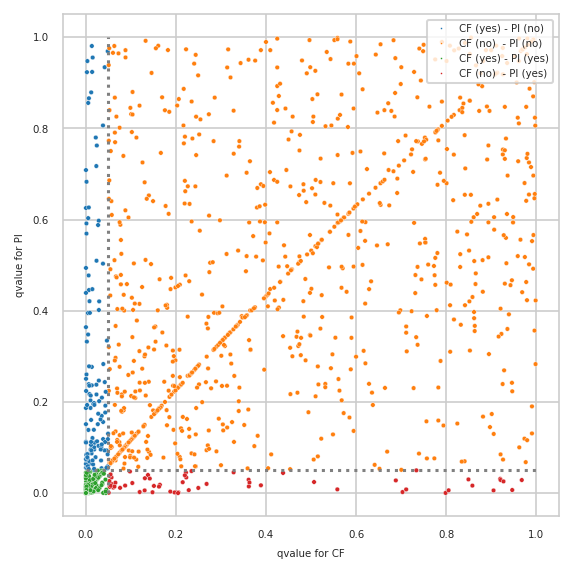

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


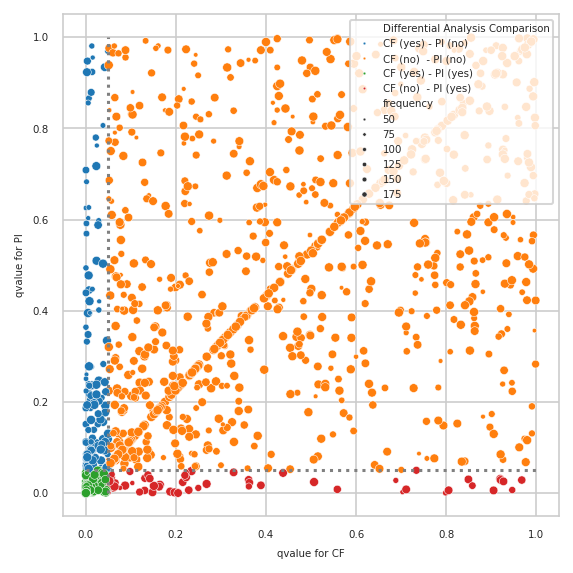

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out